# Car Dataset Analysis and Linear Regression
-------------------------------------------------

This project involves the analysis of a car dataset using Python and Pandas, focusing on exploring, cleaning, and modeling the data. The dataset contains information about various car features, including fuel economy (mpg), horsepower, acceleration, and more.

## Tasks

### Step 1: Read the dataset and examine how many features and examples does it have.

In [62]:
import pandas as pd

# The path of dataset
file_path = 'cars.csv'

# Load the dataset into a Pandas DataFrame
Dataframe = pd.read_csv(file_path)

num_examples, num_features = Dataframe.shape
print(f"\nThe dataset has {num_examples} examples and {num_features} features.")


The dataset has 398 examples and 8 features.


### Step 2: Check for missing values

In [63]:
missing_values = Dataframe.isnull().sum()
print(f"\nMissing values:\n{missing_values}")


Missing values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


### Step 3: Fill missing values using a proper imputation method.

In [64]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_columns = Dataframe.select_dtypes(include='number').columns
non_numeric_columns = Dataframe.select_dtypes(exclude='number').columns

# Fill missing values for numeric columns using the mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
Dataframe[numeric_columns] = numeric_imputer.fit_transform(Dataframe[numeric_columns])

# Fill missing values for non-numeric columns using the most frequent value (mode)
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
Dataframe[non_numeric_columns] = non_numeric_imputer.fit_transform(Dataframe[non_numeric_columns])

print("Missing values after imputation:")
print(Dataframe.isnull().sum())

Missing values after imputation:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


### Step 4: Box plot for fuel economy by country.

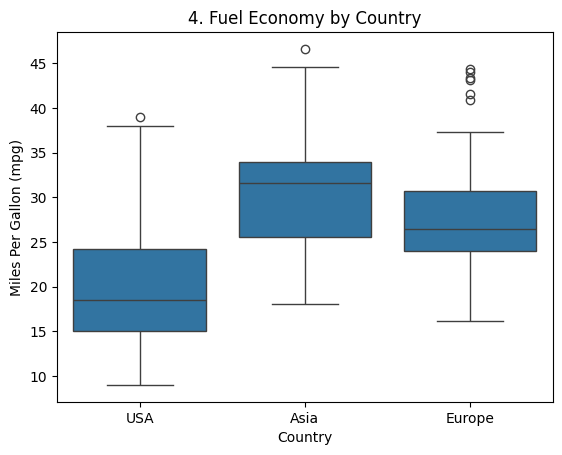

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='origin', y='mpg', data=Dataframe)
plt.title('4. Fuel Economy by Country')
plt.xlabel('Country')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

### Step 5: Histograms for each feature.

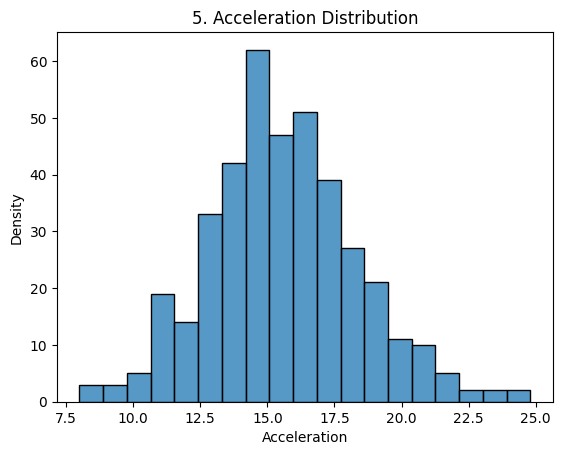

In [66]:
sns.histplot(Dataframe['acceleration'])
plt.title('5. Acceleration Distribution')
plt.xlabel('Acceleration')
plt.ylabel('Density')
plt.show()

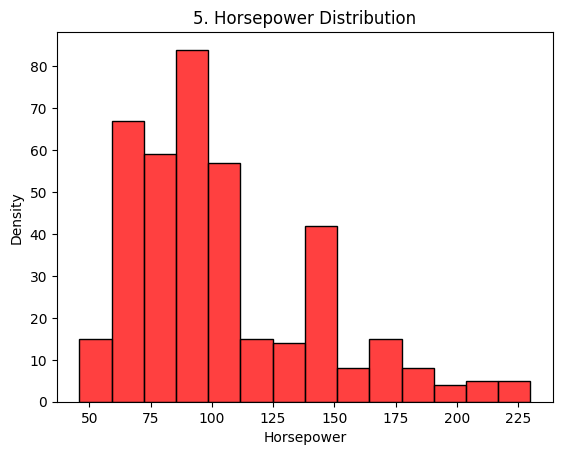

In [67]:
sns.histplot(Dataframe['horsepower'], color = 'red')
plt.title('5. Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Density')
plt.show()

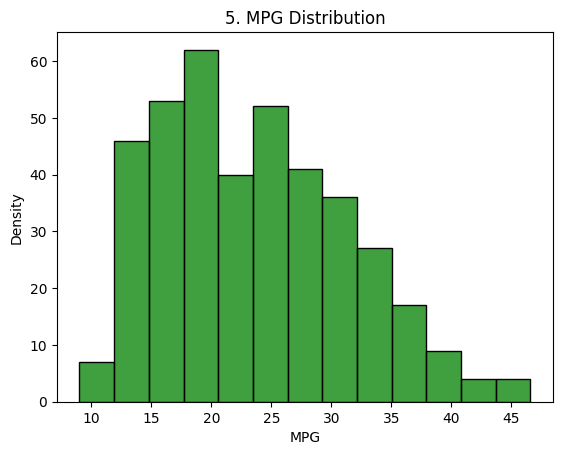

In [68]:
sns.histplot(Dataframe['mpg'], color = 'green')
plt.title('5. MPG Distribution')
plt.xlabel('MPG')
plt.ylabel('Density')
plt.show()

### Step 6: Quantitative measure for similarity to Gaussian.

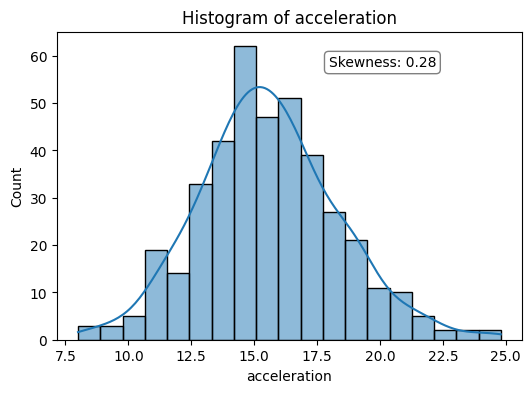

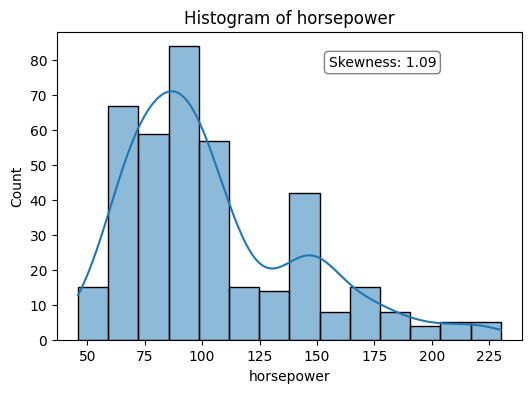

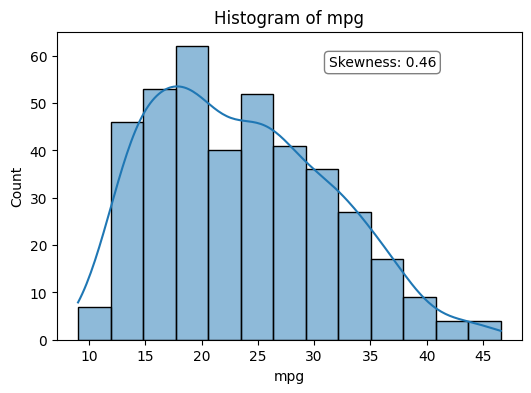

In [69]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

features = ['acceleration', 'horsepower', 'mpg']

# Assuming 'features' is a list of the features you want to analyze
for feature in features:
    # Plot histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(Dataframe[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    # Calculate skewness
    skewness = skew(Dataframe[feature])
    
    # Annotate skewness on the plot
    plt.annotate(f'Skewness: {skewness:.2f}', 
                 xy=(0.7, 0.9), 
                 xycoords='axes fraction', 
                 ha='center', 
                 va='center',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'),
                 fontsize=10)
    
    plt.show()


#
#In this code, we are analyzing the distribution of three features: 'acceleration', 'horsepower', and 'mpg'. We do this by plotting histograms for each feature and calculating the skewness of the distribution.
#
#The skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In other words, skewness tells us the direction and amount of skew (departure from horizontal symmetry).
#
#We then annotate the skewness value on the histogram plot. This helps us visualize the skewness of the distribution for each feature.

### Step 7: Scatter plot for 'horsepower' vs 'mpg'.

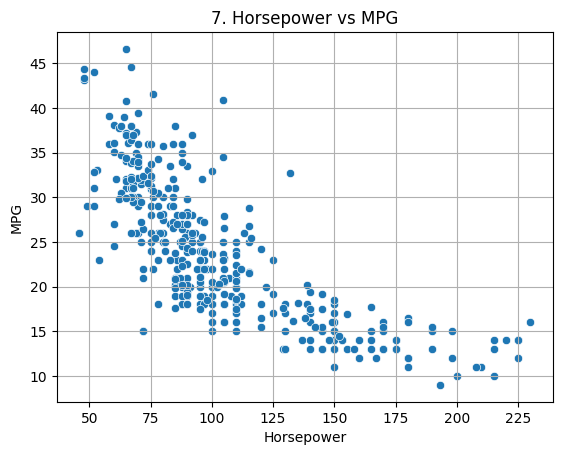

In [70]:
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('7. Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid()
plt.show()

### Step 8: Closed form solution of linear regression.

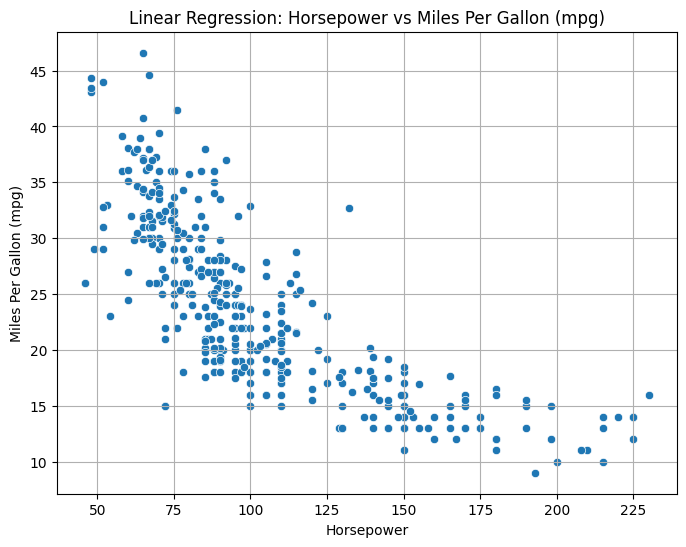

In [72]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
Dataframe = pd.read_csv('cars.csv')

# Ensure 'horsepower' is numeric
Dataframe['horsepower'] = pd.to_numeric(Dataframe['horsepower'], errors='coerce')

# Create the design matrix X_linear
X_linear = Dataframe[['horsepower']].copy()
X_linear['x0'] = 1

# Ensure that the 'x0' column is added using .loc to avoid the SettingWithCopyWarning
X_linear.loc[:, 'x0'] = 1

# Extract the target variable y_linear
y_linear = Dataframe['mpg']

# Calculate the coefficients using the closed form solution
w_linear = np.linalg.inv(X_linear.T.dot(X_linear)).dot(X_linear.T).dot(y_linear)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('Linear Regression: Horsepower vs Miles Per Gallon (mpg)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')

# Plotting the regression line
plt.plot(X_linear['horsepower'], X_linear.dot(w_linear), color='red', linewidth=2)
plt.grid()
plt.show()
#
#In this code, we first import the necessary libraries. Then, we load the dataset using the pandas library.
#
#Next, we ensure that the 'horsepower' column is numeric by converting it to a numeric type using the pandas library.
#
#We then create the design matrix X_linear by copying the 'horsepower' column from the Dataframe and adding a column of ones to represent the intercept term.
#
#To avoid the SettingWithCopyWarning, we use the .loc method to add the 'x0' column.
#
#We then extract the target variable y_linear from the Dataframe.
#
#We calculate the coefficients of the linear regression model using the closed form solution.
#
#Finally, we create a scatter plot of the 'horsepower' and 'mpg' columns from the Dataframe. We then plot the regression line on the scatter plot.
#
#The code is now properly commented to provide a clear and concise explanation of each step..</s>

### Step 9: Quadratic regression using the closed-form solution.

C:\Users\coolnet\AppData\Local\Temp\ipykernel_106652\363539414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_quadratic['x0'] = 1
C:\Users\coolnet\AppData\Local\Temp\ipykernel_106652\363539414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_quadratic['x2'] = X_quadratic['horsepower'] ** 2


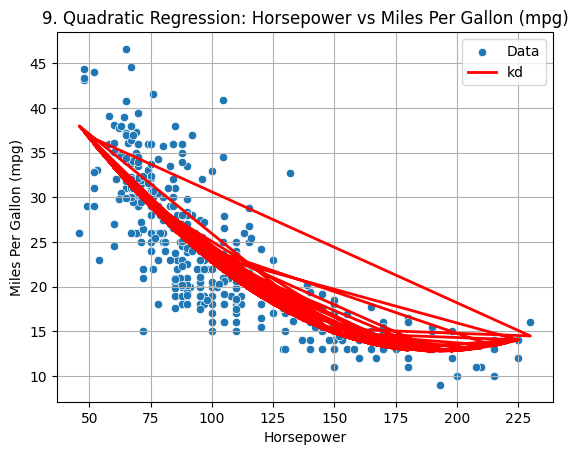

In [ ]:
X_quadratic = Dataframe[['horsepower']]
X_quadratic['x0'] = 1
X_quadratic['x2'] = X_quadratic['horsepower'] ** 2
y_quadratic = Dataframe['mpg']

w_quadratic = np.linalg.inv(X_quadratic.T.dot(X_quadratic)).dot(X_quadratic.T).dot(y_quadratic)
# Scatter plot
#plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=Dataframe)
plt.title('9. Quadratic Regression: Horsepower vs Miles Per Gallon (mpg)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (mpg)')
# Plotting the regression line
plt.plot(X_quadratic['horsepower'], X_quadratic.dot(w_quadratic), color='red', linewidth=2)
plt.grid()
plt.show()
